In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Load the two csv files of Alltrails data taken from https://github.com/oschow/take-a-hike/tree/master/AllTrails/data

In [51]:
trail_df = pd.read_csv('data/all_hikes_with_hike_name.csv')
ratings_df = pd.read_csv('data/all_ratings_matrix.csv')

Let's look at what data is in the all_hikes_with_hike_name.csv.

In [168]:
trail_df.head()

,hike_name,hike_region,total_distance,elevation_gain,hike_difficulty,stars,hike_id,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views
0,Maxwell Falls Lower Trail,Arapaho National Forest,4.2,1008,2,3.9,hike0,1,0,0,1,0,1,1,1,0,1,0,0
1,Royal Arch Trail,Chautauqua Park,3.4,1651,3,4.4,hike1,0,1,0,1,0,0,0,0,0,1,0,1
2,Beaver Brook /Chavez Trail Loop,Genesee Park,3.9,1008,2,4.4,hike2,1,0,0,1,0,0,1,1,0,0,1,0
3,The Incline Trail,Manitou Park Recreation Area,3.6,1976,3,4.7,hike3,1,0,0,0,0,0,0,0,0,1,1,1
4,Emerald Lake Trail,Rocky Mountain National Park,3.3,767,1,4.6,hike4,0,1,0,0,1,0,0,1,1,1,1,1


Are there any null values in the data?

In [171]:
print(trail_df.isnull().sum(axis=0),ratings_df.isnull().sum(axis=0))

hike_name          0
hike_region        0
total_distance     0
elevation_gain     0
hike_difficulty    0
stars              0
hike_id            0
loop               0
out_and_back       0
point_to_point     0
dog_friendly       0
kid_friendly       0
camping            0
waterfall          0
river              0
lake               0
wildflowers        0
wildlife           0
views              0
dtype: int64 hike_id     0
variable    0
value       0
dtype: int64


The data looks clean but it is missing some valuable information that could have been scraped, including: latitude and longitude, additional keywords, the number of photos taken, the number of reviews and the average rating. Fortunately all_ratings_matrix.csv contains ratings for each trail. Let's combine these two df's into one.

In [98]:
ratings_groups = ratings_df.groupby('hike_id')
nratings = ratings_groups.count()
nratings = nratings.drop('value',axis=1)
meanrating = ratings_groups.mean()
ratings_by_hike = pd.concat([nratings,meanrating],axis=1)
ratings_by_hike = ratings_by_hike.rename(columns={'variable':'reviews','value':'mean rating'})

In [114]:
df = trail_df.merge(ratings_by_hike,on='hike_id')
df

,hike_name,hike_region,total_distance,elevation_gain,hike_difficulty,stars,hike_id,loop,out_and_back,point_to_point,...,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views,reviews,mean rating
0,Maxwell Falls Lower Trail,Arapaho National Forest,4.2,1008,2,3.9,hike0,1,0,0,...,0,1,1,1,0,1,0,0,372,3.849462
1,Royal Arch Trail,Chautauqua Park,3.4,1651,3,4.4,hike1,0,1,0,...,0,0,0,0,0,1,0,1,391,4.375959
2,Beaver Brook /Chavez Trail Loop,Genesee Park,3.9,1008,2,4.4,hike2,1,0,0,...,0,0,1,1,0,0,1,0,288,4.371528
3,The Incline Trail,Manitou Park Recreation Area,3.6,1976,3,4.7,hike3,1,0,0,...,0,0,0,0,0,1,1,1,389,4.670951
4,Emerald Lake Trail,Rocky Mountain National Park,3.3,767,1,4.6,hike4,0,1,0,...,1,0,0,1,1,1,1,1,266,4.616541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,Foothills Nature Trail to CCC Shelter,Roosevelt National Forest,2.0,498,1,3.0,hike1482,0,1,0,...,0,0,0,1,0,1,1,1,1,3.000000
1483,Sinton Trail,"Roswell, Colorado",5.6,374,1,4.0,hike1483,0,1,0,...,1,0,0,0,0,1,1,1,1,4.000000
1484,Uncompahgre River Walk,"Montrose, Colorado",14.4,411,1,3.0,hike1484,0,1,0,...,1,0,0,1,0,0,1,1,1,3.000000
1485,Mayhoffer Trail Loop,"Superior, Colorado",10.8,872,1,2.0,hike1485,1,0,0,...,1,0,0,0,0,0,0,0,1,2.000000


We now have one table with data for 1487 trails in Colorado, including the number of reviews per trail and their mean value.
Let's quickly look at other stats for the dataset.

In [182]:
df.describe()

,total_distance,elevation_gain,hike_difficulty,stars,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views,reviews,mean rating
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,7.742636,1726.087424,1.914593,4.100874,0.342300,0.600538,0.057162,0.503026,0.405514,0.134499,0.111634,0.236718,0.271015,0.675185,0.560188,0.750504,16.033625,4.098141
std,8.705549,1652.256755,0.726426,0.652085,0.474639,0.489953,0.232230,0.500159,0.491157,0.341302,0.315022,0.425211,0.444634,0.468463,0.496531,0.432867,34.611109,0.659230
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.200000,501.000000,1.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.833333
50%,6.000000,1320.000000,2.000000,4.100000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,4.129032
75%,9.900000,2427.000000,2.000000,4.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,14.000000,4.513167
max,230.600000,20714.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,391.000000,5.000000


array([[<AxesSubplot:title={'center':'total_distance'}>,
        <AxesSubplot:title={'center':'elevation_gain'}>,
        <AxesSubplot:title={'center':'hike_difficulty'}>,
        <AxesSubplot:title={'center':'stars'}>],
       [<AxesSubplot:title={'center':'loop'}>,
        <AxesSubplot:title={'center':'out_and_back'}>,
        <AxesSubplot:title={'center':'point_to_point'}>,
        <AxesSubplot:title={'center':'dog_friendly'}>],
       [<AxesSubplot:title={'center':'kid_friendly'}>,
        <AxesSubplot:title={'center':'camping'}>,
        <AxesSubplot:title={'center':'waterfall'}>,
        <AxesSubplot:title={'center':'river'}>],
       [<AxesSubplot:title={'center':'lake'}>,
        <AxesSubplot:title={'center':'wildflowers'}>,
        <AxesSubplot:title={'center':'wildlife'}>,
        <AxesSubplot:title={'center':'views'}>],
       [<AxesSubplot:title={'center':'reviews'}>,
        <AxesSubplot:title={'center':'mean rating'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=objec

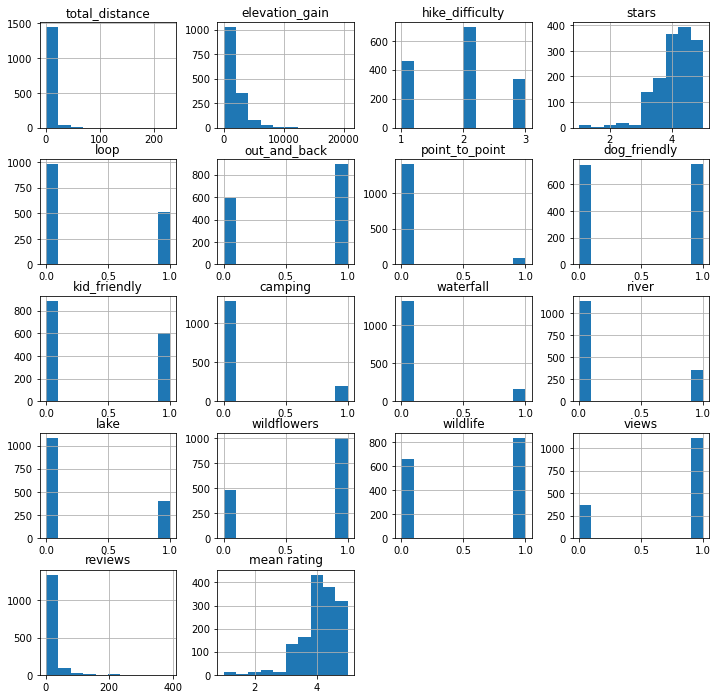

In [116]:
df.hist(figsize=(12,12))

<AxesSubplot:>

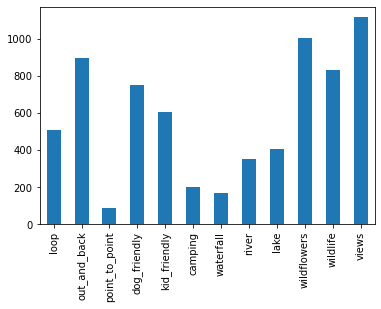

In [191]:
tags = df.loc[:,'loop':'views']
tag_tot = tags.sum()
tag_tot.plot(kind='bar',)

Let's narrow down our focus on just the ratings.

<AxesSubplot:>

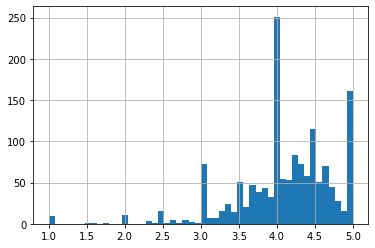

In [121]:
df['mean rating'].hist(bins=50)

There seems to be outliers for integer valued ratings. This may be due to there being many trails with few reviews, but let's make sure by excluding those.

<AxesSubplot:>

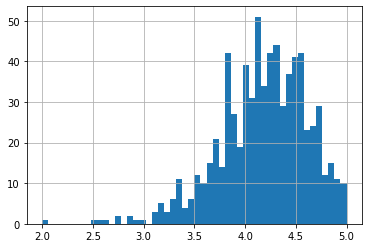

In [175]:
df[df['reviews']>5]['mean rating'].hist(bins=50)

The distrubution looks more 'normal' with a distribution roughly centered around the mean of 4.1 stars.
Now that we know what the ratings look like, lets see if we can answer our question:\
What makes trails popular?\
To start, let's look at trail length and elevation gain.

(0.0, 10000.0)

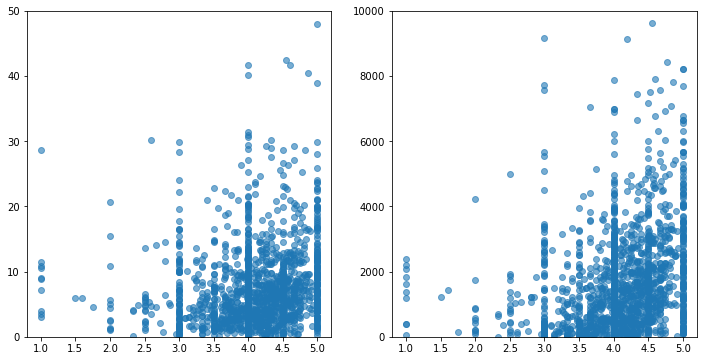

In [146]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(df['mean rating'],df['total_distance'],alpha=0.6)
axs[0].set_ylim(0,50)
axs[1].scatter(df['mean rating'],df['elevation_gain'],alpha=0.6)
axs[1].set_ylim(0,10000)

There appears to be some correlation between both trail length and elevation gain. Maybe by plotting a correlation matrix, we can see what variables are most correlated withe each other.

In [190]:
df.corr()

,total_distance,elevation_gain,hike_difficulty,stars,loop,out_and_back,point_to_point,dog_friendly,kid_friendly,camping,waterfall,river,lake,wildflowers,wildlife,views,reviews,mean rating
total_distance,1.000000,0.720790,0.195450,0.105841,-0.121773,0.047651,0.148349,-0.004141,-0.258083,0.107734,0.038997,0.109439,0.035313,0.060491,0.021357,0.064702,-0.092420,0.106317
elevation_gain,0.720790,1.000000,0.514317,0.253383,-0.235088,0.158793,0.145465,0.009938,-0.463874,0.197848,0.074250,0.097563,0.084485,0.095158,0.056778,0.115803,-0.053195,0.255667
hike_difficulty,0.195450,0.514317,1.000000,0.262125,-0.243049,0.219835,0.032948,-0.018736,-0.679947,0.163076,0.074039,0.015388,0.102963,0.072670,0.054374,0.096977,0.030734,0.259546
stars,0.105841,0.253383,0.262125,1.000000,-0.144035,0.105778,0.071216,0.005872,-0.229293,0.084739,0.129907,0.069879,0.117089,0.063053,0.097626,0.106865,0.098997,0.992392
loop,-0.121773,-0.235088,-0.243049,-0.144035,1.000000,-0.884549,-0.177634,0.050911,0.255740,-0.084993,-0.066708,-0.118335,-0.082737,-0.008078,0.002468,-0.009848,0.042721,-0.138225
out_and_back,0.047651,0.158793,0.219835,0.105778,-0.884549,1.000000,-0.301903,-0.060970,-0.238046,0.104198,0.092915,0.111798,0.098798,0.035358,0.040806,0.021575,-0.009803,0.103186
point_to_point,0.148349,0.145465,0.032948,0.071216,-0.177634,-0.301903,1.000000,0.024581,-0.020465,-0.046123,-0.059689,0.005990,-0.039340,-0.058088,-0.091135,-0.025391,-0.066632,0.064810
dog_friendly,-0.004141,0.009938,-0.018736,0.005872,0.050911,-0.060970,0.024581,1.000000,0.116904,0.115879,0.121714,0.173826,0.097681,0.154983,0.146269,0.163566,0.152807,0.005928
kid_friendly,-0.258083,-0.463874,-0.679947,-0.229293,0.255740,-0.238046,-0.020465,0.116904,1.000000,-0.120845,-0.044865,-0.050721,-0.075257,0.090267,0.041961,0.042559,0.059646,-0.228283
camping,0.107734,0.197848,0.163076,0.084739,-0.084993,0.104198,-0.046123,0.115879,-0.120845,1.000000,0.179464,0.216346,0.189781,0.092440,0.107066,0.090640,0.015967,0.087429


<AxesSubplot:>

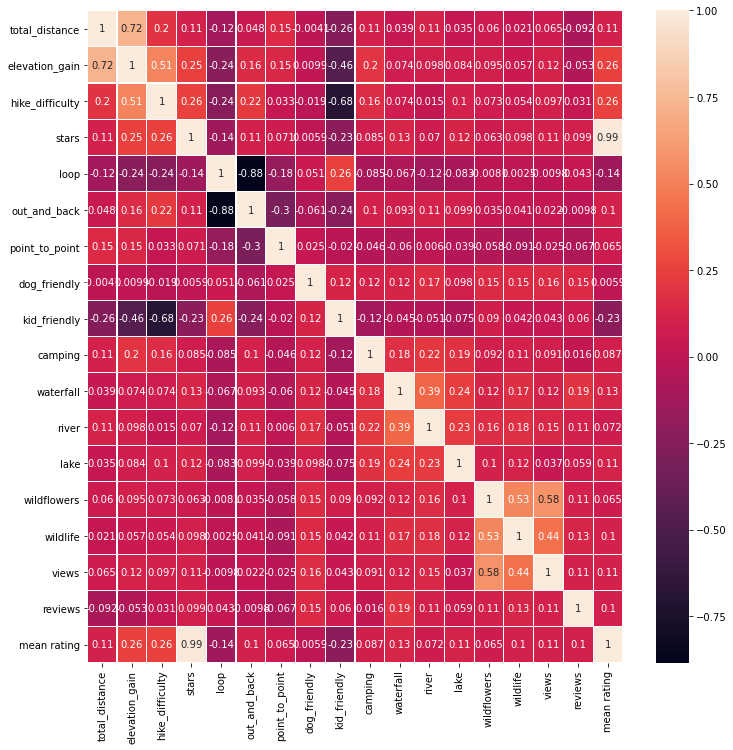

In [189]:
fig, ax = plt.subplots(figsize=(12,12)) 
sn.heatmap(df.corr(),annot=True,linewidths=0.1,ax=ax)

As expected, there is some positive correlation of elevation gain and trail length with how it's rated. However, this correlation does not appear to be strong. Other interesting features that stick out are a negative correlation of kid-friendly trails and ratings and a strong positive correlation of wildlife and wildflowers with views.

## Hypothesis Forming:

*High rated hikes are more likely to be longer and more difficult and not kid friendly* 
* Null hypothesis: hike length or total elevation gain have no effect on hike rating.

*Popular hikes (most reviews) feature waterfalls and wildflowers.* 
* Null hypothesis: popular hikes have no distinctive features.




<AxesSubplot:>

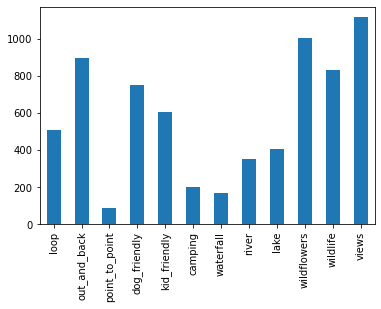

In [167]:
tags = df.loc[:,'loop':'views']
tag_tot = tags.sum()
tag_tot.plot(kind='bar',)

8.466583229036294